In [1]:
import cv2
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
!which python3

/usr/bin/python3


In [3]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages=graphframes:graphframes:0.7.0-spark2.4-s_2.11 pyspark-shell'
os.environ['PYSPARK_DRIVER_PYTHON'] = '/usr/bin/python3'
os.environ['PYSPARK_PYTHON'] = '/usr/bin/python3'

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("mosaic").getOrCreate()
sc = spark.sparkContext

In [5]:
def chunk(img, n):
    """
    n = number of images 
    """
    shape = img.shape
    imgs = []

    ny = np.sqrt((shape[1]*n)/shape[0]) 
    nx = n/ny
    
    x = int(shape[1]/nx)
    y = int(shape[0]/ny)
    
    print(f"y = {y}, x = {x}")
    if x < 1 or y < 1:
        return None
    
    arr = []
    for i in range(0, shape[0], y):
        for j in range(0, shape[1],x):
            patch = img[i:(i+y), j:(j+x), :]
            arr.append((i, j, patch))

    return arr

def mean(item):
    m = np.mean(item[2], axis=(0,1))
    return (item[0], item[1], m)

14
y = 6, x = 14


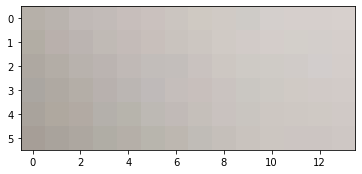

In [16]:
path = os.path.join(os.getcwd(), 'cachorro.png')
img = cv2.imread(path,cv2.IMREAD_COLOR )
chunks = chunk(img, 30000)
plt.imshow(chunks[0][2])
plt.show()

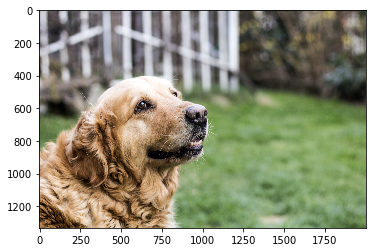

In [7]:
plt.imshow(img[:,:,::-1])
plt.show()

In [8]:
res = sc.parallelize(chunks).map(mean).take(1)

In [13]:
res

[(0, 0, array([169.76359447, 165.13548387, 166.1281106 ]))]

# Banco de dados
`com index red black`